# **Lab07: Histogram of Oriented Gradients**

In [0]:
# Import Statements
from sklearn import metrics, svm
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
mnist = fetch_openml('mnist_784')
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [0]:
mnist.target = mnist.target.astype(np.float64)
mnist.data = mnist.data.reshape((70000, 28, 28))

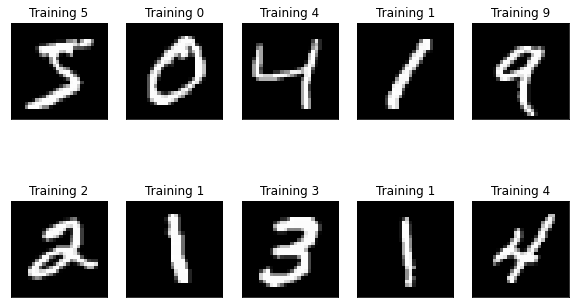

In [4]:
# Visualize MNIST dataset
fig = plt.figure(figsize=(10, 6))
rows = 2
columns = 5

for index in range(10):
  fig.add_subplot(rows, columns, index + 1, xticks=[], yticks=[])
  plt.title("Training %i" % mnist.target[index])
  plt.imshow(mnist.data[index], cmap="gray")

plt.show()

In [0]:
# Use HOG Descriptor to compute features
orientations = 6
ppc = (4,4)
cpb = (4,4)
hog_images = []
hog_features = []
for image in mnist.data:
    fd,hog_image = hog(image, orientations=orientations, pixels_per_cell=ppc,cells_per_block=cpb,
                       block_norm= 'L2', visualize=True)
    hog_images.append(hog_image)
    hog_features.append(fd)

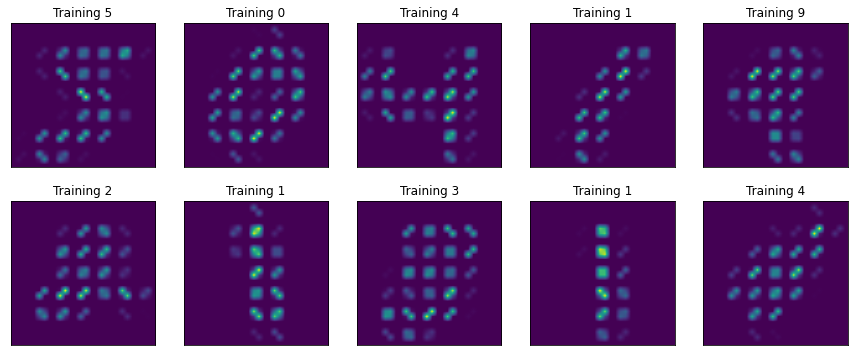

In [8]:
# Visualize hog features
fig = plt.figure(figsize=(15,6))
rows = 2
columns = 5

for index in range(10):
  fig.add_subplot(rows, columns, index + 1, xticks=[], yticks=[])
  plt.title("Training %i" % mnist.target[index])
  plt.imshow(hog_images[index], interpolation="bilinear")

plt.show()

In [9]:
hog_features = np.array(hog_features)
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(hog_features, mnist.target, test_size=10000, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 1536), (60000,), (10000, 1536), (10000,))

In [55]:
# Train Linear SVM
svm_clf = svm.LinearSVC()
svm_clf.fit(X_train, Y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [57]:
# Train and Test Accuracy
Y_train_pred = svm_clf.predict(X_train)
Y_test_pred = svm_clf.predict(X_test)
train_accuracy = metrics.accuracy_score(Y_train, Y_train_pred)
test_accuracy = metrics.accuracy_score(Y_test, Y_test_pred)

print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  0.9883333333333333
Test Accuracy:  0.9808


In [58]:
# Print Test Classification Report
report = metrics.classification_report(y_pred=Y_test_pred, y_true=Y_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       983
         1.0       0.99      1.00      0.99      1152
         2.0       0.97      0.97      0.97       967
         3.0       0.99      0.98      0.98      1034
         4.0       0.98      0.98      0.98       906
         5.0       0.99      0.99      0.99       937
         6.0       0.99      0.99      0.99       961
         7.0       0.97      0.98      0.98      1055
         8.0       0.96      0.96      0.96       969
         9.0       0.98      0.96      0.97      1036

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



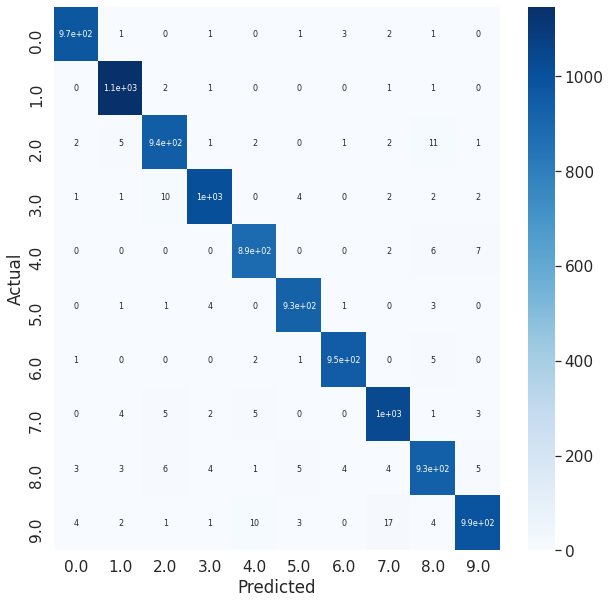

In [59]:
# Confusion Matrix
cm = metrics.confusion_matrix(Y_test, Y_test_pred)

df_cm = pd.DataFrame(cm, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10, 10))
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})# font size